In [36]:
import seaborn as sns
import pandas as pd 
import datetime as datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np
import re
# Read data from file 'filename.csv' |
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later)
pd.options.display.float_format = '{:,.2f}'.format
# data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv.final_lowdata") 
data = pd.read_csv("/home/anconam/projects/Shapley_Pruning/experiments/results/log.csv") 

data['timestamp'].apply(lambda row: str(row))

# Some processing
data['test_acc'] *= 100
data['train_acc'] *= 100
data['test_acc_pp'] *= 100
data["total_time"] = data["train_time"] + data["prune_time"]
data["sparsity"] = data["n_params"] / data["n_params_full"] * 100
data["test_acc_gap"] = (data["test_acc"] - data["test_acc"].max())
data["total_time_cum"] = data.groupby(['experiment', 'timestamp'])['total_time'].apply(lambda x: x.cumsum())
data["method_name"] = data["experiment"].apply(lambda x: x.split("__")[1].split("_")[0])
data["act_sparsity"] = data["experiment"].apply(lambda x: float(re.findall(r"\d+.\d+", x.split("__")[1].split("_")[1])[0]))
data["max_gap"] = data["experiment"].apply(lambda x: float(re.findall(r"\d+.\d+", x.split("__")[1].split("_")[1])[0]))
# sns.palplot(sns.color_palette("Paired"))
data.tail()

,timestamp,epoch,train_acc,test_acc,test_acc_pp,train_loss,test_loss,test_loss_pp,n_params,flops,...,train_time,prune_time,experiment,total_time,sparsity,test_acc_gap,total_time_cum,method_name,act_sparsity,max_gap
859,20200206T145938,11,90.40,87.62,87.62,0.37,0.50,0.50,"8,758,666.00","1,041,995,776.00",...,4.29,0.00,cifar10__random_s:0.75_steps:11_start:0_int:1_...,4.29,57.42,-5.97,37.70,random,0.75,0.75
860,20200206T145938,12,90.40,87.62,87.62,0.37,0.50,0.50,"8,758,666.00","1,041,995,776.00",...,1.38,0.00,cifar10__random_s:0.75_steps:11_start:0_int:1_...,1.38,57.42,-5.97,39.09,random,0.75,0.75
861,20200206T145938,13,90.40,87.62,87.62,0.37,0.50,0.50,"8,758,666.00","1,041,995,776.00",...,1.35,0.00,cifar10__random_s:0.75_steps:11_start:0_int:1_...,1.35,57.42,-5.97,40.43,random,0.75,0.75
862,20200206T145938,14,90.60,87.62,87.62,0.37,0.50,0.50,"8,758,666.00","1,041,995,776.00",...,1.29,0.00,cifar10__random_s:0.75_steps:11_start:0_int:1_...,1.29,57.42,-5.97,41.73,random,0.75,0.75
863,20200206T145938,15,90.40,87.62,87.62,0.37,0.50,0.50,"8,758,666.00","1,041,995,776.00",...,2.32,0.00,cifar10__random_s:0.75_steps:11_start:0_int:1_...,2.32,57.42,-5.97,44.05,random,0.75,0.75


In [37]:
# Pre fine-tuning
df_pp = data[data.epoch.eq(10) & data.act_sparsity.eq(0.25)]
df_pp = df_pp.groupby(["method_name",  "act_sparsity"], as_index=False).agg(
                      {'test_acc_pp':['mean','std']})
df_pft = data[data.epoch.eq(11) & data.act_sparsity.eq(0.25)]
df_pft = df_pft.groupby(["method_name",  "act_sparsity"], as_index=False).agg(
                      {'test_acc':['mean','std']})
df_pp.set_index(["method_name", "act_sparsity"]).join(df_pft.set_index(["method_name", "act_sparsity"]), lsuffix="_")

test_acc_pp      test_acc      
                                   mean  std     mean   std
method_name    act_sparsity                                
count          0.25               18.00 7.87    18.00  7.87
grad           0.25               17.41 6.49    17.41  6.49
random         0.25               12.95 4.04    12.95  4.04
sv-loss-2std#5 0.25               32.46 1.77    32.46  1.77
taylor-abs     0.25               21.47 9.99    21.47  9.99
weight         0.25               14.93 3.69    31.95 26.32

In [38]:
df_pp = data[data.epoch.eq(10) & data.act_sparsity.eq(0.50)]
df_pp = df_pp.groupby(["method_name",  "act_sparsity"], as_index=False).agg(
                      {'test_acc_pp':['mean','std']})
df_pft = data[data.epoch.eq(11) & data.act_sparsity.eq(0.50)]
df_pft = df_pft.groupby(["method_name",  "act_sparsity"], as_index=False).agg(
                      {'test_acc':['mean','std']})
df_pp.set_index(["method_name", "act_sparsity"]).join(df_pft.set_index(["method_name", "act_sparsity"]), lsuffix="_")

test_acc_pp       test_acc      
                                   mean   std     mean   std
method_name    act_sparsity                                 
count          0.50               59.55 11.29    66.79  2.68
grad           0.50               51.16 11.42    60.54  1.57
random         0.50               63.62  7.67    63.62  7.67
sv-loss-2std#5 0.50               72.05  4.88    72.05  4.88
taylor-abs     0.50               67.86  2.26    69.73  3.37
weight         0.50               50.25  8.49    53.30 12.30

In [39]:
df_pp = data[data.epoch.eq(10) & data.act_sparsity.eq(0.75)]
df_pp = df_pp.groupby(["method_name",  "act_sparsity"], as_index=False).agg(
                      {'test_acc_pp':['mean','std']})
df_pft = data[data.epoch.eq(11) & data.act_sparsity.eq(0.75)]
df_pft = df_pft.groupby(["method_name",  "act_sparsity"], as_index=False).agg(
                      {'test_acc':['mean','std']})
df_pp.set_index(["method_name", "act_sparsity"]).join(df_pft.set_index(["method_name", "act_sparsity"]), lsuffix="_")

test_acc_pp       test_acc      
                                   mean   std     mean   std
method_name    act_sparsity                                 
count          0.75               84.02  0.87    86.23  0.76
grad           0.75               66.54 11.60    75.59 12.45
random         0.75               85.73  0.60    86.96  0.87
sv-loss-2std#5 0.75               88.45  0.58    88.45  0.58
taylor-abs     0.75               79.53  1.12    80.50  0.57
weight         0.75               72.39  0.14    73.36  1.74

In [40]:
# Load all models that have been loaded from a pretrained one
D = data[data["experiment"].str.contains("load")]
# D = D[D["experiment"].str.contains("s:0.2")]

full_acc = D["test_acc"].max()
experiments = D["experiment"].unique()

def format_plt(ax, title, xlabel, ylabel):
    plt.sca(ax)
    plt.box(False)
    plt.tick_params(color="#222222", labelcolor="#222222")
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    plt.gca().yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)
    if title:
        plt.title(title)


COLORS = ["orange",
          "#4e79a7",
          "#59a14f",
          "#9c755f",
          "#666666",
          "#e15759",
          "#b07aa1",
          "#BEAD53",
          "grey"]

map_names = {
#     "sv-loss-99p#5": ("SV 99p (5 samples)", "b"),

#     "sv-loss-2std#2": ("SV (2 samples)", COLORS[5]),
#     "sv-loss-abs#5": ("SV Abs (5 samples)","black"),
    "sv-loss-2std#5": ("SV (5 samples)", COLORS[5]),
#     "sv-loss-2std#15": ("SV (15 samples)", COLORS[5]),

#     "sv-loss-99p#5": ("SV 99p (2 samples)", "b"),
    "sv-loss#5": ("SV 00p (5 samples)", "b"),
    "random": ("Random", COLORS[0]),
    "grad": ("Saliency",COLORS[2]),
    "taylor-abs": ("Taylor",COLORS[1]),
    "count": ("APoZ",COLORS[8]),
    "weight": ("$||w||_1$",COLORS[6]),
}


In [41]:
## CIFAR 10

In [42]:
dataset = "cifar10"


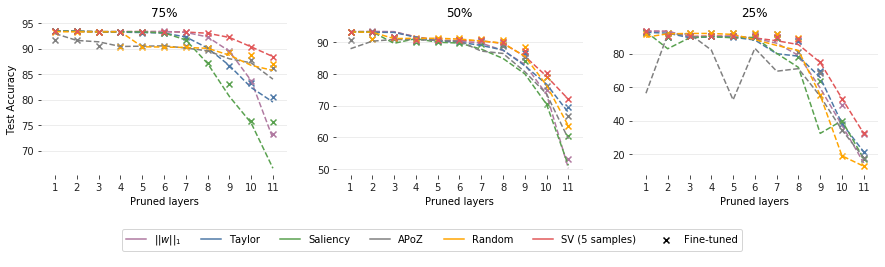

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15,4))

for idx, sparsity in enumerate([0.75, 0.50, 0.25]):
    
    plot_df = data[data["experiment"].str.startswith(dataset)]
    plot_df = plot_df[plot_df["act_sparsity"] == sparsity]
    ax = axes[idx]
    methods = plot_df['method_name'].unique()
    for method_name in methods:
        if method_name not in map_names:
            continue
        label, color = map_names[method_name]
        d = plot_df[plot_df["method_name"] == method_name]
        epochs = d["epoch"].unique()
        acc_over_time = np.array(d.groupby(["epoch"]).mean()["test_acc"])
        acc_pp_over_time = np.array(d.groupby(["epoch"]).mean()["test_acc_pp"])

        ticks = epochs
        ax.scatter(1+epochs[:11], acc_over_time[1:12], marker='x', color=color, zorder=100 if "SV" in label else 1)
        ax.plot(1+epochs[:11], acc_pp_over_time[:11], color=color, linestyle="dashed")
        ax.plot([], [], label=label, color=color, linestyle="solid")
        format_plt(ax, f"{sparsity * 100:.0f}%", "Pruned layers", "Test Accuracy" if idx == 0 else "")
        plt.xticks(np.arange(1, 12, step=1))
#         ax.set_ylim([75, 95])

        
plt.scatter([], [], marker='x', color="black", label="Fine-tuned")


handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "Fine" in t[1] else -1))

fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='upper center', bbox_to_anchor=(0.40, 0.15), ncol=7)
plt.savefig(f"cifar10_pruning_low_data_newrun.pdf", bbox_inches='tight')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Automatic legend placement (loc='best') not implemented for figure legend. Falling back on 'upper right'. This will raise an exception in 3.3.


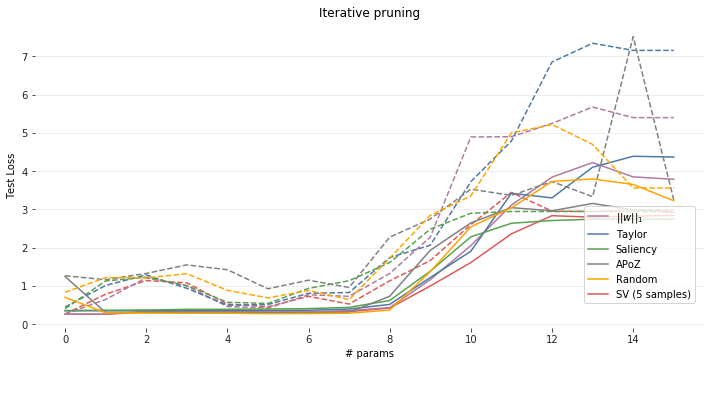

In [34]:
fig = plt.figure(figsize=(12,8))
methods = plot_df['method_name'].unique()
for method_name in methods:
    if method_name not in map_names:
        continue
    label, color = map_names[method_name]
    d = plot_df[plot_df["method_name"] == method_name]
    d0 = d#[d["epoch"] == 16]
    d1 = d#[d["epoch"] == 16]
    epochs = d["epoch"].unique()
#     acc = np.array(d1.groupby(["n_params"]).mean()["test_acc"])
    loss_over_time = np.array(d.groupby(["epoch"]).mean()["test_loss"])
#     acc_std = np.array(d1.groupby(["n_params"]).std()["test_acc"])
#     acc_pp = np.array(d0.groupby(["n_params"]).mean()["test_acc_pp"])
    loss_over_time_pp = np.array(d.groupby(["epoch"]).max()["test_loss_pp"])
#     acc_pp_std = np.array(d0.groupby(["n_params"]).std()["test_acc_pp"])
    params = d1["n_params"].unique()
    
    ticks = params
    ax1 = plt.plot(epochs, loss_over_time, label=label, color=color)
#     plt.fill_between(ticks, acc + acc_std, acc - acc_std, alpha=.1, color=color)
    ax2 = plt.plot(epochs[:16], loss_over_time_pp[:16], color=color, linestyle="dashed")
#     plt.fill_between(ticks, acc_pp + acc_pp_std, acc_pp - acc_pp_std, alpha=.1, color=color)


# plt.gca().invert_xaxis()
# plt.xscale("log")
format_plt(plt.gca(), f"Iterative pruning", "# params", "Test Loss")
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "Fine" in t[1] else -1))
fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='best', bbox_to_anchor=(0.81, 0.38), ncol=1)

ValueError: not enough values to unpack (expected 2, got 0)

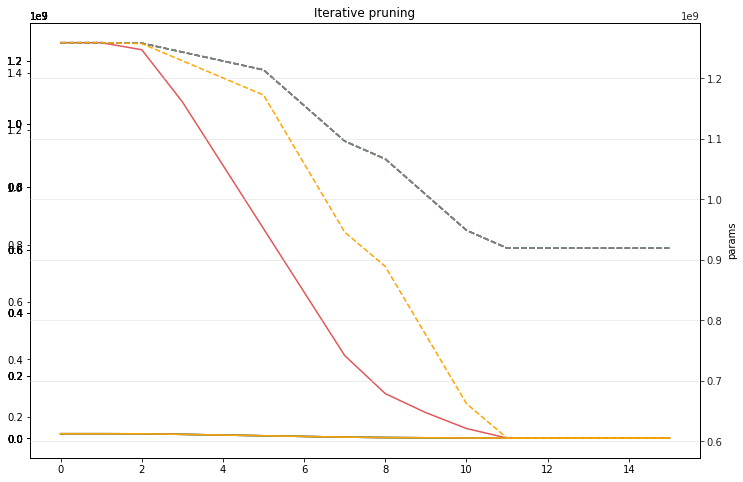

In [10]:
fig = plt.figure(figsize=(12,8))
methods = plot_df['method_name'].unique()
for method_name in methods:
    label, color = map_names[method_name]
    d = plot_df[plot_df["method_name"] == method_name]
    d0 = d[d["epoch"] == 16]
    d1 = d[d["epoch"] == 16]
    epochs = d["epoch"].unique()
    acc = np.array(d1.groupby(["n_params"]).mean()["test_acc"])
    acc_over_time = np.array(d.groupby(["epoch"]).mean()["test_acc"])
    acc_std = np.array(d1.groupby(["n_params"]).std()["test_acc"])
    acc_pp = np.array(d0.groupby(["n_params"]).mean()["test_acc_pp"])
    acc_pp_over_time = np.array(d.groupby(["epoch"]).mean()["test_acc_pp"])
    acc_pp_std = np.array(d0.groupby(["n_params"]).std()["test_acc_pp"])
    params = np.array(d.groupby(["epoch"]).mean()["n_params"])
    flops = np.array(d.groupby(["epoch"]).mean()["flops"])

#     params = d1["n_params"].unique()
    
    ticks = params
    ax1 = plt.plot(epochs, params, label=label, color=color)
#     plt.fill_between(ticks, acc + acc_std, acc - acc_std, alpha=.1, color=color)
    ax2 = plt.twinx()
    ax2 = plt.plot(epochs, flops, color=color, linestyle="dashed")
#     plt.fill_between(ticks, acc_pp + acc_pp_std, acc_pp - acc_pp_std, alpha=.1, color=color)


# plt.gca().invert_xaxis()
# plt.xscale("log")
format_plt(plt.gca(), f"Iterative pruning", "# epoch", "params")
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='best', bbox_to_anchor=(0.81, 0.38), ncol=1)

In [ ]:
dataset = "mnist"
plot_df = data[data["experiment"].str.startswith(dataset)]

In [ ]:
fig = plt.figure(figsize=(12,8))
methods = plot_df['method_name'].unique()
for method_name in methods:
    label, color = map_names[method_name]
    d = plot_df[plot_df["method_name"] == method_name]
    d0 = d[d["epoch"] == 0]
    d1 = d[d["epoch"] == 1]
    acc = np.array(d1.groupby(["n_params"]).mean()["test_acc"])
    acc_std = np.array(d1.groupby(["n_params"]).std()["test_acc"])
    acc_pp = np.array(d0.groupby(["n_params"]).mean()["test_acc_pp"])
    acc_pp_std = np.array(d0.groupby(["n_params"]).std()["test_acc_pp"])
    params = d1["n_params"].unique()
    
    ticks = params
    ax1 = plt.plot(ticks, acc, label=label, color=color)
    plt.fill_between(ticks, acc + acc_std, acc - acc_std, alpha=.1, color=color)
    ax2 = plt.plot(ticks, acc_pp, color=color, linestyle="dashed")
    plt.fill_between(ticks, acc_pp + acc_pp_std, acc_pp - acc_pp_std, alpha=.1, color=color)


plt.gca().invert_xaxis()
plt.xscale("log")
format_plt(plt.gca(), f"Iterative pruning", "# params", "Test Accuracy")
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='best', bbox_to_anchor=(0.21, 0.38), ncol=1)

In [ ]:
fig = plt.figure(figsize=(12,8))
methods = plot_df['method_name'].unique()
for method_name in methods:
    label, color = map_names[method_name]
    d = plot_df[plot_df["method_name"] == method_name]
    d0 = d[d["epoch"] == 0]
    d1 = d[d["epoch"] == 1]
    acc = np.array(d1.groupby(["flops"]).mean()["test_acc"])
    acc_std = np.array(d1.groupby(["flops"]).std()["test_acc"])
    acc_pp = np.array(d0.groupby(["flops"]).mean()["test_acc_pp"])
    acc_pp_std = np.array(d0.groupby(["flops"]).std()["test_acc_pp"])
    flops = d1["flops"].unique()
    
    ticks = flops
    ax1 = plt.plot(ticks, acc, label=label, color=color)
    plt.fill_between(ticks, acc + acc_std, acc - acc_std, alpha=.1, color=color)
    ax2 = plt.plot(ticks, acc_pp, color=color, linestyle="dashed")
    plt.fill_between(ticks, acc_pp + acc_pp_std, acc_pp - acc_pp_std, alpha=.1, color=color)


plt.gca().invert_xaxis()
plt.xscale("log")
format_plt(plt.gca(), f"Iterative pruning", "FLOPs", "Test Accuracy")
handles, labels = plt.gca().get_legend_handles_labels()
handles, labels  = zip(*sorted(zip(handles, labels), key=lambda t: 1 if "SV" in t[1] else -1))
fig.subplots_adjust(bottom=.35)
fig.legend(handles, labels,loc='best', bbox_to_anchor=(0.21, 0.38), ncol=1)